In [1]:
import numpy as np
from sklearn import cluster, datasets, mixture
import matplotlib.pyplot as plt

# ============
# Generate datasets. We choose the size big enough to see the scalability
# of the algorithms, but not too big to avoid too long running times
# ============
n_samples = 500
noisy_circles = datasets.make_circles(n_samples=n_samples, factor=0.5, noise=0.05)
noisy_moons = datasets.make_moons(n_samples=n_samples, noise=0.05)
blobs = datasets.make_blobs(n_samples=n_samples, random_state=8)
no_structure = np.random.rand(n_samples, 2), None
# Anisotropically distributed data
random_state = 170
X, y = datasets.make_blobs(n_samples=n_samples, random_state=random_state)
transformation = [[0.6, -0.6], [-0.4, 0.8]]
X_aniso = np.dot(X, transformation)
aniso = (X_aniso, y)
# blobs with varied variances
varied = datasets.make_blobs(n_samples=n_samples, cluster_std=[1.0, 2.5, 0.5], random_state=random_state)


# create a list with all the datasets
datasets_list = [noisy_circles, noisy_moons, blobs, no_structure, aniso, varied]

# create a list with the names of the datasets
datasets_names = ["Noisy Circles", "Noisy Moons", "Blobs", "No Structure", "Anisotropic", "Varied Variances"]

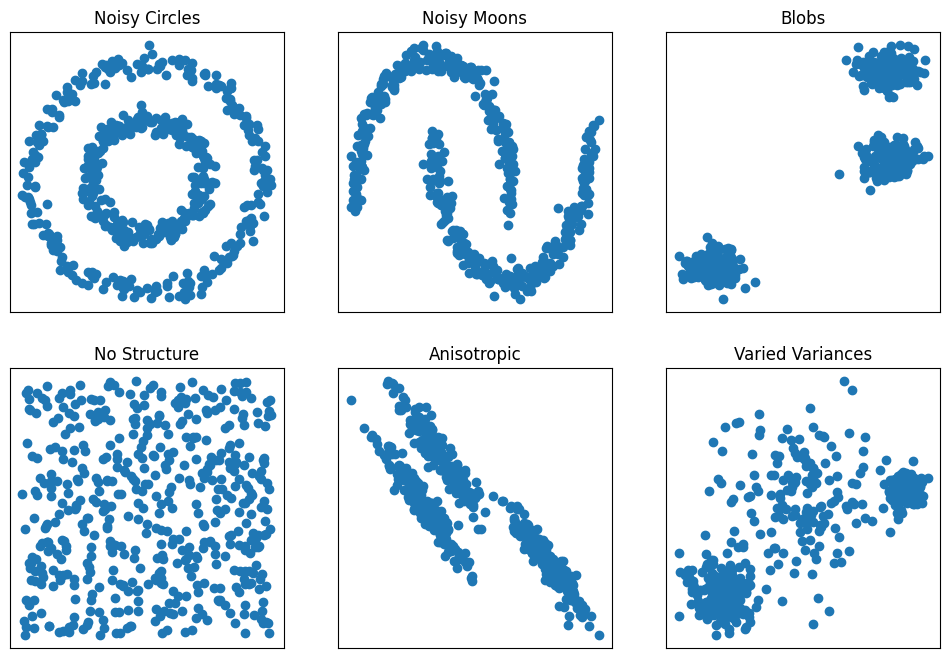

In [2]:
# create a figure with 2 rows and 3 columns of subplots
fig, axes = plt.subplots(2, 3, figsize=(12, 8))

# loop through all datasets and plot Dataset
for ax, dataset, name in zip(axes.ravel(), datasets_list, datasets_names):
    # set the number of clusters
    n_clusters = 3
    if name in ["Noisy Circles", "Noisy Moons"]:
        n_clusters = 2
    # plot each Dataset
    ax.scatter(dataset[0][:, 0], dataset[0][:, 1])
    ax.set_title(name)
    ax.set_xticks([])
    ax.set_yticks([])

plt.show();

### What can you say about them?
They are Datasets with very different distributions. Each of them is useful for testing the performance of different models, for example:
1. Noisy Circles and Noisy Moons Datasets have a similar structure, where there are two sets of points that are slightly overlapping and noisy. These datasets could be useful for testing classification algorithms.
2. The Blobs Dataset has multiple clearly defined groups of points, which makes it a good dataset for testing clustering algorithms.
3. The No Structure Dataset has no clear structure or defined groups, making it a good dataset for testing anomaly detection algorithms or for evaluating the ability of algorithms to handle unstructured data.
4. The Anisotropic Dataset has multiple groups of points with anisotropic distributions, making it a good dataset for testing clustering algorithms that can handle groups with different shapes and orientations.
5. The Varied Variance Dataset has multiple groups of points with different variances, making it a good dataset for testing clustering algorithms that can handle groups of different sizes and densities.

## Apply KMeans

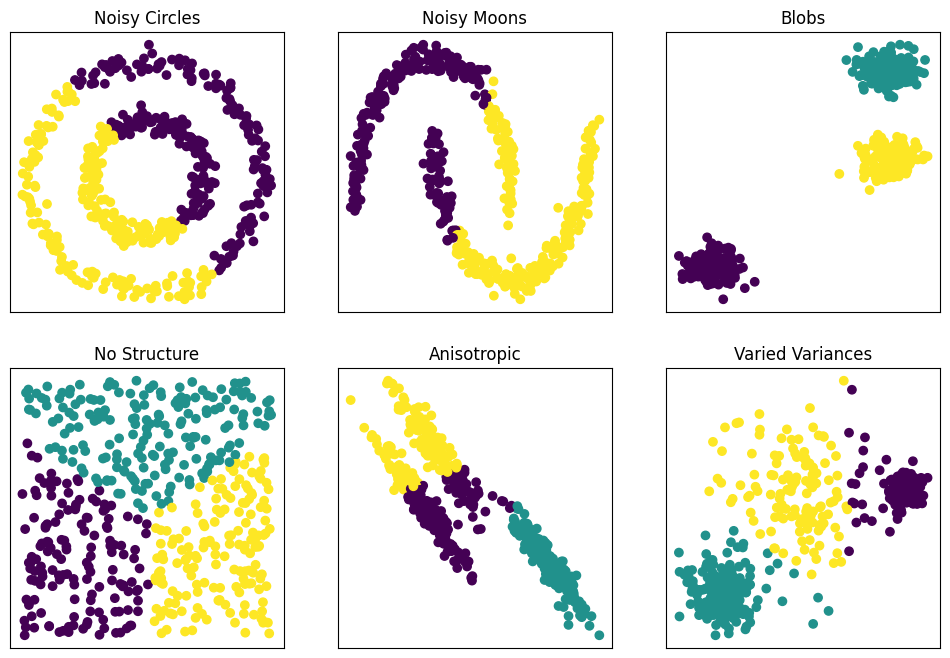

In [3]:
from sklearn.cluster import KMeans

# create a figure with 2 rows and 3 columns of subplots
fig, axes = plt.subplots(2, 3, figsize=(12, 8))

# loop through all datasets and apply KMeans
for ax, dataset, name in zip(axes.ravel(), datasets_list, datasets_names):
    # set the number of clusters
    n_clusters = 3
    if name in ["Noisy Circles", "Noisy Moons"]:
        n_clusters = 2
    # create the KMeans object
    algorithm = KMeans(n_clusters=n_clusters, n_init=10)
    # fit the model to the data
    algorithm.fit(dataset[0])
    # get the labels assigned
    labels = algorithm.predict(dataset[0])
    # plot the clusters
    ax.scatter(dataset[0][:, 0], dataset[0][:, 1], c=labels, cmap='viridis')
    ax.set_title(name)
    ax.set_xticks([])
    ax.set_yticks([])

plt.show();

## Apply KMedoids

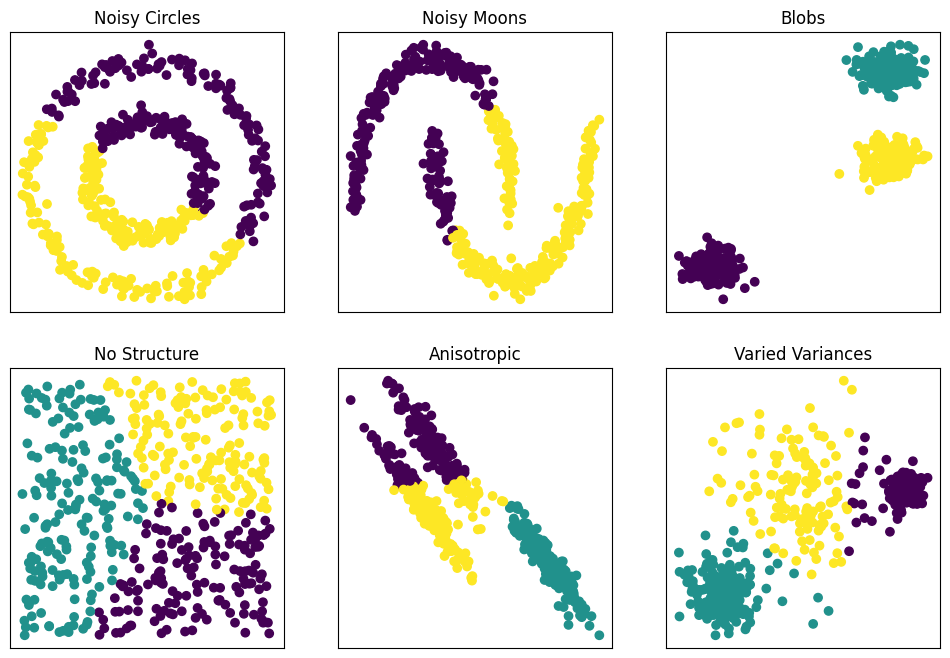

In [4]:
from sklearn_extra.cluster import KMedoids

# create a figure with 2 rows and 3 columns of subplots
fig, axes = plt.subplots(2, 3, figsize=(12, 8))

# loop through all datasets and apply KMedoids
for ax, dataset, name in zip(axes.ravel(), datasets_list, datasets_names):
    # set the number of clusters
    n_clusters = 3
    if name in ["Noisy Circles", "Noisy Moons"]:
        n_clusters = 2
    # create the KMedoids object
    algorithm = KMedoids(n_clusters=n_clusters)
    # fit the model to the data
    algorithm.fit(dataset[0])
    # get the labels assigned
    labels = algorithm.predict(dataset[0])
    # plot the clusters
    ax.scatter(dataset[0][:, 0], dataset[0][:, 1], c=labels, cmap='viridis')
    ax.set_title(name)
    ax.set_xticks([])
    ax.set_yticks([])

plt.show();

## Apply DBSCAN

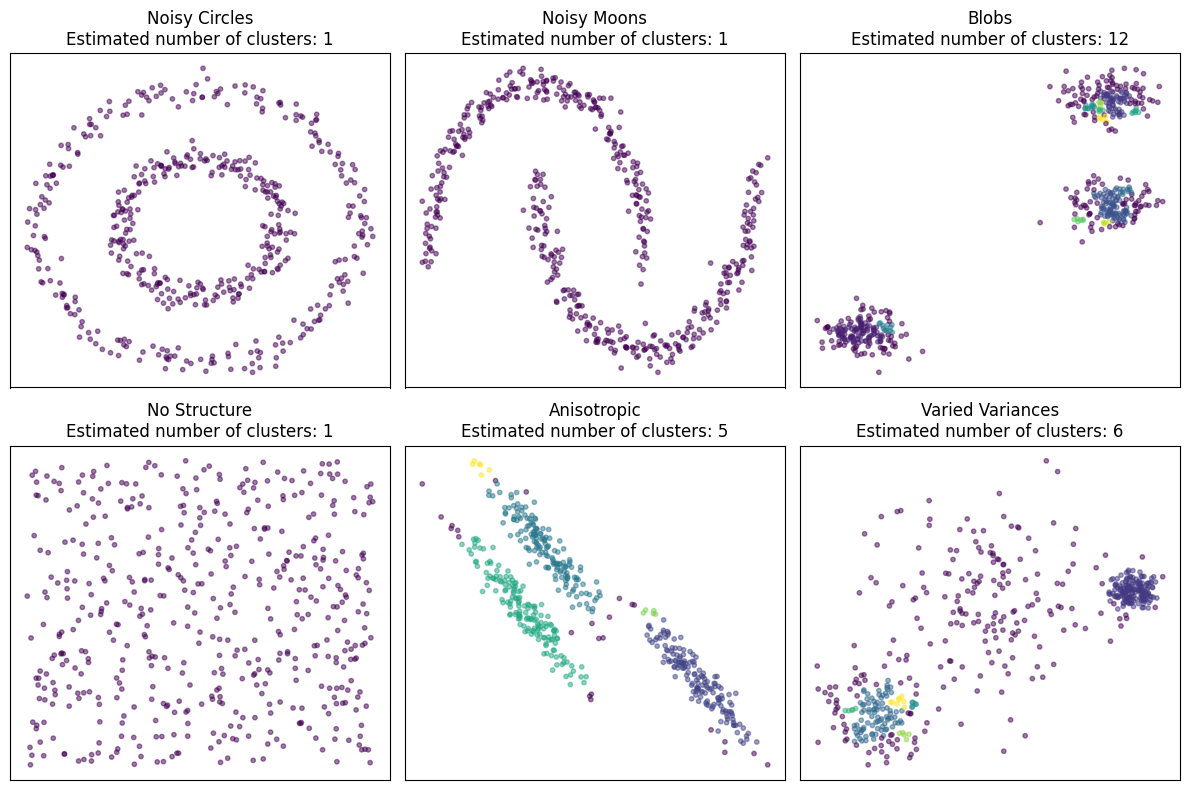

In [5]:
from sklearn.cluster import DBSCAN

# create a figure with 2 rows and 3 columns of subplots
fig, axes = plt.subplots(2, 3, figsize=(12, 8))

# loop through all datasets and apply DBSCAN
for ax, dataset, name in zip(axes.ravel(), datasets_list, datasets_names):
    # create the DBSCAN object
    algorithm = DBSCAN(eps=0.3, min_samples=5)
    # fit the model to the data
    algorithm.fit(dataset[0])
    # get the labels assigned
    labels = algorithm.labels_
    unique_labels = set(labels)
    # set the number of clusters
    n_clusters = len(unique_labels) - (1 if -1 in labels else 0)
    # plot the clusters
    ax.scatter(dataset[0][:, 0], dataset[0][:, 1], c=labels, cmap='viridis', s=10, alpha=0.5)

    ax.set_title(f'{name}\nEstimated number of clusters: {n_clusters}')
    ax.set_xticks([])
    ax.set_yticks([])

plt.tight_layout()
plt.show();

## Apply Spectral Clustering

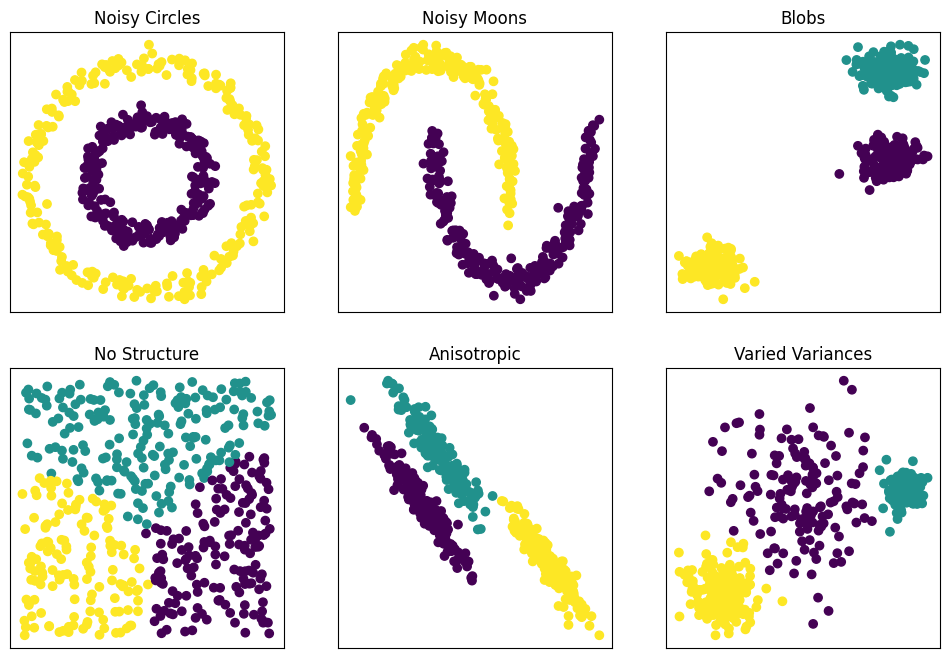

In [7]:
from sklearn.cluster import SpectralClustering

import warnings
warnings.filterwarnings('ignore')

# create a figure with 2 rows and 3 columns of subplots
fig, axes = plt.subplots(2, 3, figsize=(12, 8))

# loop through all datasets and apply SpectralClustering
for ax, dataset, name in zip(axes.ravel(), datasets_list, datasets_names):
    # set the number of clusters
    n_clusters = 3
    if name in ["Noisy Circles", "Noisy Moons"]:
        n_clusters = 2
    # create the SpectralClustering object
    algorithm = SpectralClustering(n_clusters=n_clusters, affinity='nearest_neighbors')
    # fit the model to the data
    algorithm.fit(dataset[0])
    # get the labels assigned
    labels = algorithm.labels_
    # plot the clusters
    ax.scatter(dataset[0][:, 0], dataset[0][:, 1], c=labels, cmap='viridis')
    ax.set_title(name)
    ax.set_xticks([])
    ax.set_yticks([])

plt.show();